In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### loading data
laptop_df = pd.read_csv("laptop_data.csv",encoding = "ISO-8859-1")
laptop_df.head(4)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360


In [3]:
laptop_df.shape

(1303, 12)

In [4]:
### checking null values
laptop_df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

There is no Null value in the dataset

In [5]:
### checking duplicate values
laptop_df.duplicated().sum()

0

there is 0 duplicated values in the dataset

In [6]:
### info of the dataset
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
laptop_df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


## Feature Engineering 

In [8]:
### handling categorical data in the columns
laptop_df["Ram"] = laptop_df["Ram"].str.replace("GB","")
laptop_df["Ram"] = laptop_df["Ram"].astype("int32")

laptop_df["Weight"] = laptop_df["Weight"].str.replace("kg","")
laptop_df["Weight"] = laptop_df["Weight"].astype("float32")

### round off the prices
laptop_df["Price"] = laptop_df["Price"].apply(round)

<AxesSubplot:ylabel='Ram'>

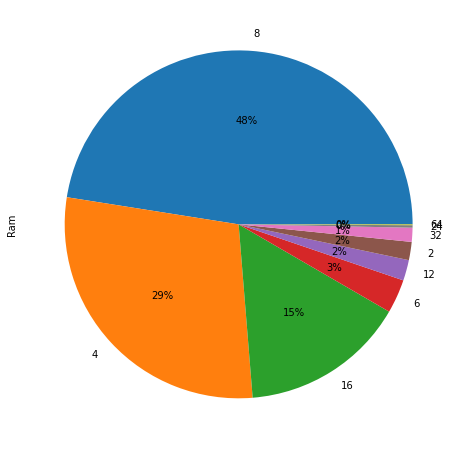

In [9]:
### most selling laptop as per Ram
plt.figure(figsize=(14,8))
laptop_df["Ram"].value_counts().plot(kind='pie',autopct='%1.0f%%')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

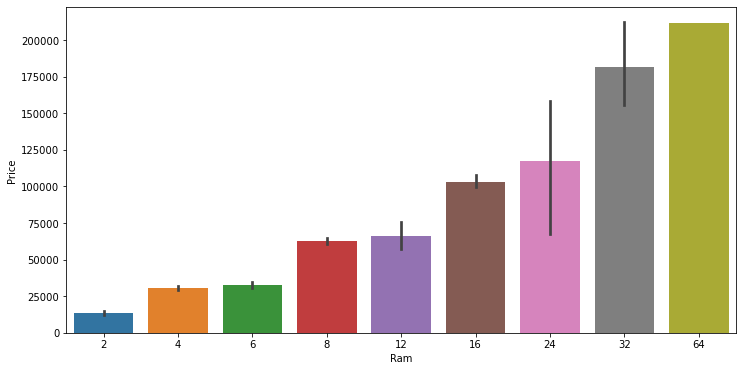

In [10]:
### price variation with ram
plt.figure(figsize=(12,6))
sns.barplot(x=laptop_df["Ram"],y=laptop_df["Price"])

- As we can see prices are directly corelated to the Ram

In [11]:
laptop_df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96096


## EDA 

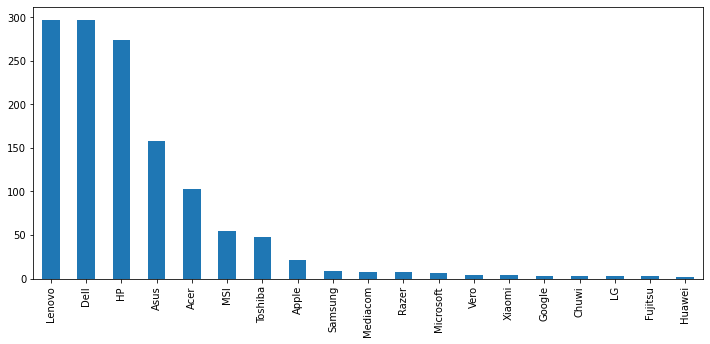

In [12]:
### most selling laptops of the dataset
plt.figure(figsize=(12,5))
laptop_df.Company.value_counts().plot(kind="bar")
plt.show()

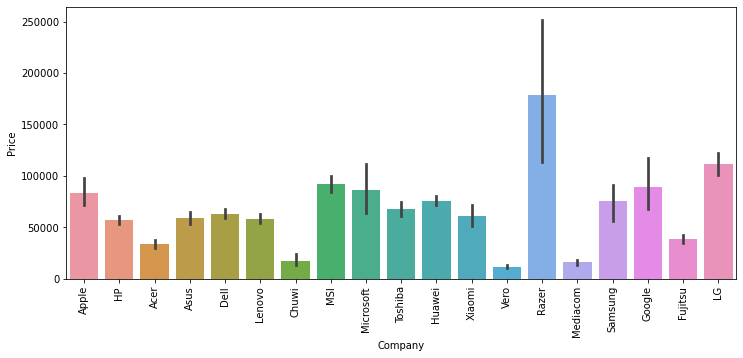

In [13]:
### laptop price with company
plt.figure(figsize=(12,5))
sns.barplot(x="Company",y="Price",data=laptop_df)
plt.xticks(rotation="vertical")
plt.show()

- laptops of Razer, LG, Google, Microsoft, MSI & Apple are in high prices

<Figure size 720x432 with 0 Axes>

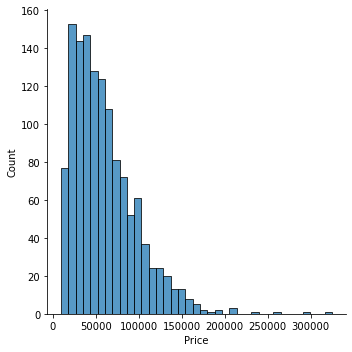

In [14]:
### distplot of dataset with price
plt.figure(figsize=(10,6))
sns.displot(laptop_df["Price"])
plt.show()

- There are so many laptops with less price & very less laptops with higher price

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64


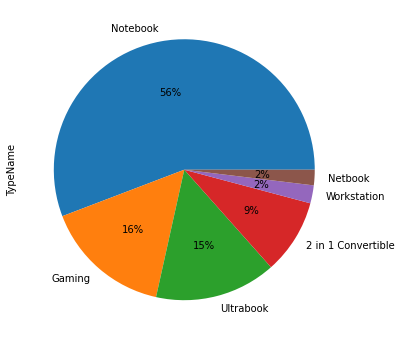

In [15]:
### types of laptop
plt.figure(figsize=(10,6))
print(laptop_df["TypeName"].value_counts())
laptop_df["TypeName"].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.show()

C:\Users\lenovo\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


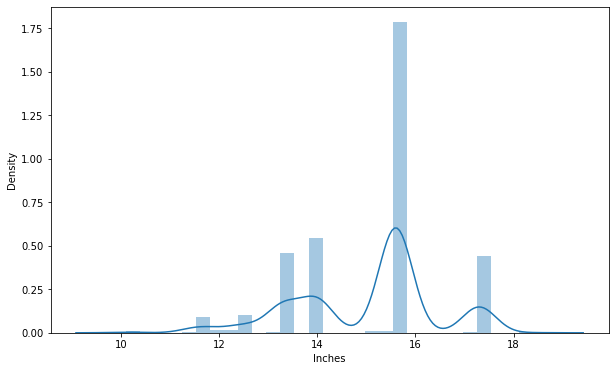

In [16]:
### distplot of Inches
plt.figure(figsize=(10,6))
sns.distplot(laptop_df["Inches"])
plt.show()

- Laptops with ~16 inches in size are most selling laptops 

C:\Users\lenovo\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


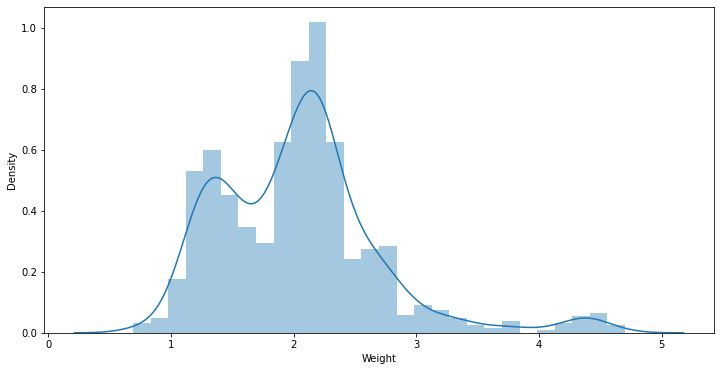

In [17]:
### distplot of weight
plt.figure(figsize=(12,6))
sns.distplot(laptop_df.Weight)
plt.show()

In [18]:
### top 20 most selling laptops with size
laptop_df.Weight.value_counts().head(20)

2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
2.50     38
2.80     28
1.20     26
1.86     25
1.90     24
1.40     24
2.04     24
2.18     23
1.50     21
1.60     20
1.70     19
1.95     18
1.80     17
1.30     17
1.10     17
Name: Weight, dtype: int64

<AxesSubplot:xlabel='Weight', ylabel='Price'>

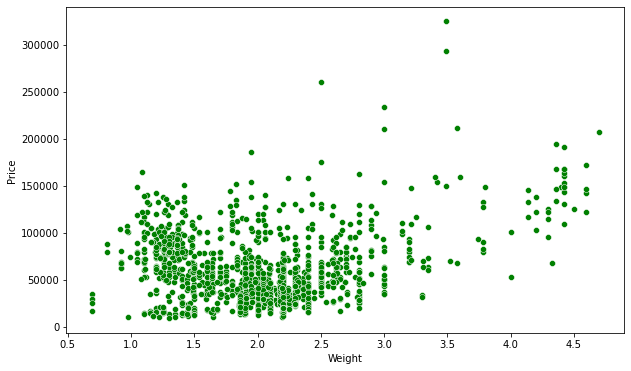

In [19]:
### scatter b/w Weight & Price
plt.figure(figsize=(10,6))
sns.scatterplot(x=laptop_df["Weight"],y=laptop_df["Price"],color="g")

- price is slightly increasing with weight
- most selling laptops are between 1-3kg of weight

C:\Users\lenovo\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


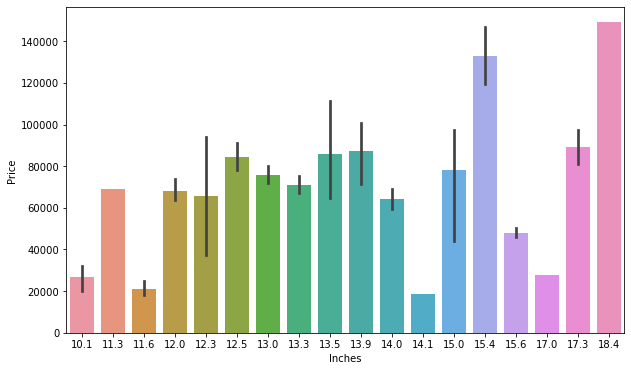

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(laptop_df["Inches"],laptop_df["Price"])
plt.show()

- As we can see increase in Inches is not a major factor in increase in price

In [21]:
''' in column ScreenResolution we can find out whether a laptop is touch screen, IPS Panel, '''
laptop_df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440               

In [22]:
# def touch_screen(screen):
#     for i in screen:
#         if "Touchscreen" in i:
#             print(1)
#         else:
#             print(0)

In [23]:
### to check Touchscreen is in ScreenResolution
laptop_df["touch_screen"] = laptop_df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0 )
laptop_df["touch_screen"].sample(5)

803     1
117     0
643     0
453     0
1110    1
Name: touch_screen, dtype: int64

0    1111
1     192
Name: touch_screen, dtype: int64


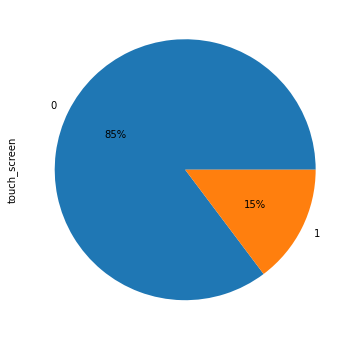

In [24]:
plt.figure(figsize=(10,6))
print(laptop_df["touch_screen"].value_counts())
laptop_df["touch_screen"].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.show()

- most of the laptops are not touch screen 

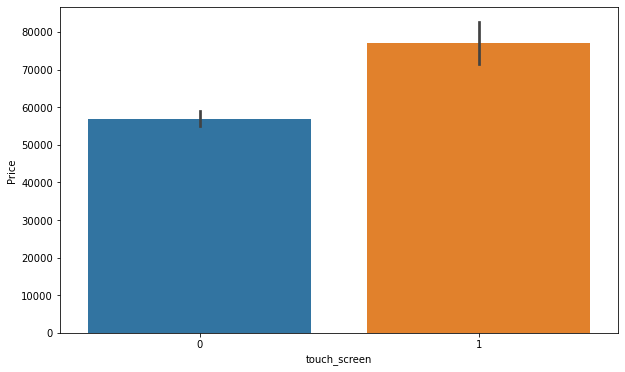

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(y=laptop_df["Price"],x=laptop_df["touch_screen"])
plt.show()

- Price of the touch_screen laptops are higher

In [26]:
### to check IPS Panel is in ScreenResolution or not
laptop_df["IPS_Panel"] = laptop_df["ScreenResolution"].apply(lambda x: 1 if "IPS Panel" in x else 0 )
laptop_df["IPS_Panel"].head(5)

0    1
1    0
2    0
3    1
4    1
Name: IPS_Panel, dtype: int64

0    938
1    365
Name: IPS_Panel, dtype: int64


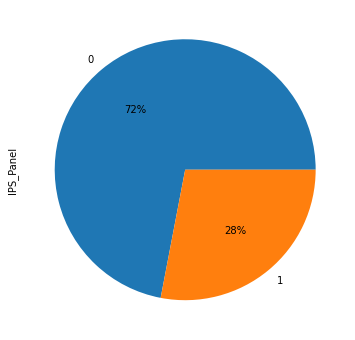

In [27]:
plt.figure(figsize=(10,6))
print(laptop_df["IPS_Panel"].value_counts())
laptop_df["IPS_Panel"].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.show()

- most of the laptops are without IPS Panel 

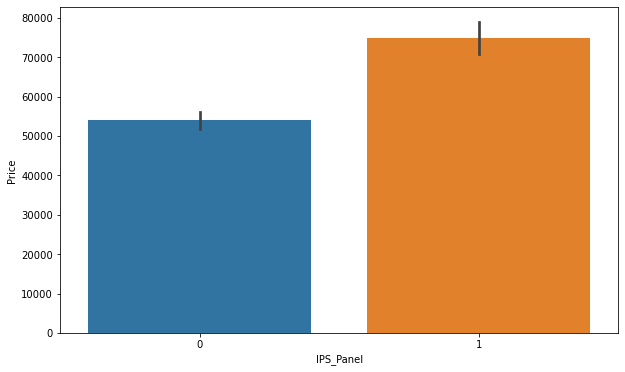

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(y=laptop_df["Price"],x=laptop_df["IPS_Panel"])
plt.show()

- Price of the IPS_Panel laptops are higher

In [29]:
laptop_df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,IPS_Panel
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96096,0,1


In [30]:
### extracting Resolution from ScreenResolution
new_resolution = laptop_df["ScreenResolution"].str.split("x")
new_resolution.head()

0    [IPS Panel Retina Display 2560, 1600]
1                              [1440, 900]
2                     [Full HD 1920, 1080]
3    [IPS Panel Retina Display 2880, 1800]
4    [IPS Panel Retina Display 2560, 1600]
Name: ScreenResolution, dtype: object

In [31]:
### getting y resolution
laptop_df["y_resolution"] = new_resolution.str[1]

### changing datatype
laptop_df["y_resolution"] = laptop_df["y_resolution"].astype(int)
laptop_df["y_resolution"].head()

0    1600
1     900
2    1080
3    1800
4    1600
Name: y_resolution, dtype: int32

In [32]:
### getting x resolution
laptop_df["x_resolution"] = new_resolution.str[0].str[-4:]

### changing datatype
laptop_df["x_resolution"] = laptop_df["x_resolution"].astype(int)
laptop_df["x_resolution"].head()

0    2560
1    1440
2    1920
3    2880
4    2560
Name: x_resolution, dtype: int32

In [33]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   int64  
 12  touch_screen      1303 non-null   int64  
 13  IPS_Panel         1303 non-null   int64  
 14  y_resolution      1303 non-null   int32  
 15  x_resolution      1303 non-null   int32  
dtypes: float32(1), float64(1), int32(3), int64

In [34]:
laptop_df.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,IPS_Panel,y_resolution,x_resolution
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,1600,2560
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,900,1440
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1080,1920


In [35]:
### dropping unuseful column
laptop_df.drop(columns=["Unnamed: 0","ScreenResolution"],axis=1,inplace=True)

### PPI - Pixles Per Inches
with the help of x_resolution, y_resolution and Inches we can find PPI 

In [36]:
### formula for ppi = ((x**2 + y**2)**0.5)/inches

laptop_df["ppi"] = ((((laptop_df["x_resolution"])**2) + ((laptop_df["y_resolution"])**2))**0.5)/laptop_df["Inches"]
laptop_df["ppi"].head()

0    226.983005
1    127.677940
2    141.211998
3    220.534624
4    226.983005
Name: ppi, dtype: float64

In [37]:
### dropping columns x_resolution, y_resolution and Inches
laptop_df.drop(columns=["x_resolution","y_resolution","Inches"],inplace=True)

In [38]:
laptop_df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,IPS_Panel,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998


### 

In [39]:
### now handling cpu column 
laptop_df.Cpu.value_counts().head(20)

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
Intel Core i5 6200U 2.3GHz               68
Intel Core i3 6006U 2GHz                 64
Intel Core i7 6500U 2.5GHz               49
Intel Core i7 6700HQ 2.6GHz              43
Intel Core i3 7100U 2.4GHz               37
Intel Core i5 7300HQ 2.5GHz              33
Intel Celeron Dual Core N3350 1.1GHz     30
Intel Celeron Dual Core N3060 1.6GHz     28
Intel Core i7 6600U 2.6GHz               18
Intel Core i3 6006U 2.0GHz               16
Intel Core i5 7300U 2.6GHz               14
Intel Pentium Quad Core N4200 1.1GHz     14
Intel Core i7 7600U 2.8GHz               13
Intel Celeron Dual Core N3050 1.6GHz     11
Intel Core i5 6300U 2.4GHz               11
Name: Cpu, dtype: int64

- from Cpu we can extract Intel Core i3, Intel Core i5, Intel Core i7

In [40]:
# laptop_df["Cpu Name"] = laptop_df["Cpu"].apply(lambda x: x.split()[0:3])
laptop_df["Cpu Name"] = laptop_df["Cpu"].str.split().str[0:3]

In [41]:
### list to string

def string(abc):
    return (" ".join(abc)) 

In [42]:
laptop_df["Cpu Name"] = laptop_df["Cpu Name"].apply(string)
laptop_df["Cpu Name"].head()

0    Intel Core i5
1    Intel Core i5
2    Intel Core i5
3    Intel Core i7
4    Intel Core i5
Name: Cpu Name, dtype: object

In [43]:
laptop_df["Cpu Name"].value_counts().head(10)

Intel Core i7           527
Intel Core i5           423
Intel Core i3           136
Intel Celeron Dual       80
Intel Pentium Quad       27
Intel Core M             19
AMD A9-Series 9420       12
Intel Celeron Quad        8
AMD A6-Series 9220        8
AMD A12-Series 9720P      7
Name: Cpu Name, dtype: int64

In [44]:
def processor(abc):
    if (abc == "Intel Core i3") or (abc == "Intel Core i5") or (abc == "Intel Core i7") or (abc == "Intel Celeron Dual"):
        return abc
    else:
        if abc.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD"

Intel Core i7            527
Intel Core i5            423
Intel Core i3            136
Intel Celeron Dual        80
Other Intel Processor     74
AMD                       63
Name: Cpu Brand, dtype: int64


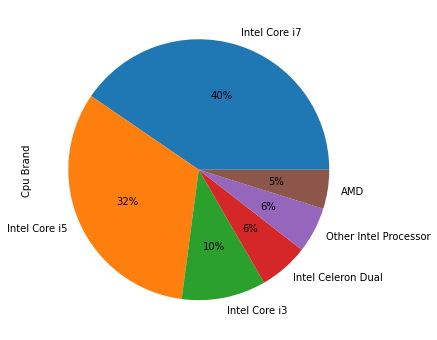

In [45]:
laptop_df["Cpu Brand"] = laptop_df["Cpu Name"].apply(processor)
print(laptop_df["Cpu Brand"].value_counts())

### ploting pie chart
plt.figure(figsize=(12,6))
laptop_df["Cpu Brand"].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

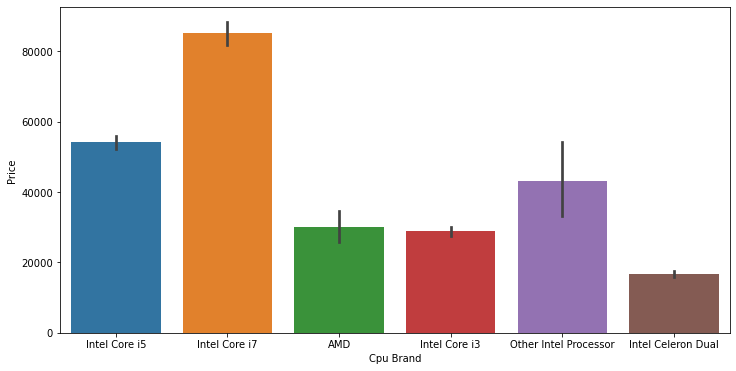

In [46]:
### price variation with Cpu Brand
plt.figure(figsize=(12,6))
sns.barplot(y=laptop_df["Price"],x=laptop_df["Cpu Brand"])
plt.show()

In [47]:
laptop_df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,IPS_Panel,ppi,Cpu Name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,Intel Core i5


In [48]:
### dropping Cpu & Cpu Name columns
laptop_df.drop(columns=["Cpu","Cpu Name"],inplace=True)

In [49]:
laptop_df.head(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,IPS_Panel,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96096,0,1,226.983005,Intel Core i5


### 

In [50]:
### handling Memory column 
laptop_df["Memory"].value_counts().head(8)

256GB SSD               412
1TB HDD                 223
500GB HDD               132
512GB SSD               118
128GB SSD +  1TB HDD     94
128GB SSD                76
256GB SSD +  1TB HDD     73
32GB Flash Storage       38
Name: Memory, dtype: int64

In [51]:
### replacing GB with ""

laptop_df['Memory'] = laptop_df['Memory'].str.replace("GB","")

# ### replacing TB with 000
laptop_df['Memory'] = laptop_df['Memory'].str.replace("TB","000")

In [52]:
laptop_df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,IPS_Panel,ppi,Cpu Brand
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96096,0,1,226.983005,Intel Core i5


In [53]:
new = laptop_df["Memory"].str.split("+", n = 1, expand = True)
new.value_counts().head(8)

0         1         
128 SSD     1000 HDD    94
256 SSD     1000 HDD    73
512 SSD     1000 HDD    14
256 SSD     2000 HDD    10
512 SSD     2000 HDD     3
256 SSD     500 HDD      2
            256 SSD      2
128 SSD     2000 HDD     2
dtype: int64

In [54]:
laptop_df["first"] = new[0]
laptop_df["first"] = laptop_df["first"].str.strip()
laptop_df["first"].value_counts().head(8)

256 SSD             500
1000 HDD            224
128 SSD             172
512 SSD             138
500 HDD             132
32 Flash Storage     38
2000 HDD             16
64 Flash Storage     16
Name: first, dtype: int64

In [55]:
laptop_df["second"] = new[1]
laptop_df["second"] = laptop_df["second"].str.strip()

### filling null values with 0
laptop_df["second"].fillna("0", inplace = True)
laptop_df["second"].value_counts()

0                1095
1000 HDD          185
2000 HDD           15
256 SSD             3
1.0000 Hybrid       2
500 HDD             2
512 SSD             1
Name: second, dtype: int64

In [56]:
laptop_df["Layer1HDD"] = laptop_df["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_df["Layer1SSD"] = laptop_df["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_df["Layer1Hybrid"] = laptop_df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_df["Layer1Flash_Storage"] = laptop_df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [57]:
laptop_df["Layer2HDD"] = laptop_df["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_df["Layer2SSD"] = laptop_df["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_df["Layer2Hybrid"] = laptop_df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_df["Layer2Flash_Storage"] = laptop_df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [58]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Ram                  1303 non-null   int32  
 3   Memory               1303 non-null   object 
 4   Gpu                  1303 non-null   object 
 5   OpSys                1303 non-null   object 
 6   Weight               1303 non-null   float32
 7   Price                1303 non-null   int64  
 8   touch_screen         1303 non-null   int64  
 9   IPS_Panel            1303 non-null   int64  
 10  ppi                  1303 non-null   float64
 11  Cpu Brand            1303 non-null   object 
 12  first                1303 non-null   object 
 13  second               1303 non-null   object 
 14  Layer1HDD            1303 non-null   int64  
 15  Layer1SSD            1303 non-null   i

In [59]:
### replacing categotical values of first column
laptop_df["first"] = laptop_df["first"].str.replace(r'\D', '')

### changing Dtype of column first
laptop_df["first"] = laptop_df["first"].astype(int)


### replacing categotical values of second column
laptop_df["second"] = laptop_df["second"].str.replace(r'\D', '')

### changing Dtype of column second
laptop_df["second"] = laptop_df["second"].astype(int)

In [60]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Ram                  1303 non-null   int32  
 3   Memory               1303 non-null   object 
 4   Gpu                  1303 non-null   object 
 5   OpSys                1303 non-null   object 
 6   Weight               1303 non-null   float32
 7   Price                1303 non-null   int64  
 8   touch_screen         1303 non-null   int64  
 9   IPS_Panel            1303 non-null   int64  
 10  ppi                  1303 non-null   float64
 11  Cpu Brand            1303 non-null   object 
 12  first                1303 non-null   int32  
 13  second               1303 non-null   int32  
 14  Layer1HDD            1303 non-null   int64  
 15  Layer1SSD            1303 non-null   i

In [61]:
laptop_df.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,IPS_Panel,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,...,256,0,0,1,0,0,0,0,0,0


In [62]:
laptop_df["HDD"]=(laptop_df["first"]*laptop_df["Layer1HDD"]+laptop_df["second"]*laptop_df["Layer2HDD"])
laptop_df["SSD"]=(laptop_df["first"]*laptop_df["Layer1SSD"]+laptop_df["second"]*laptop_df["Layer2SSD"])
laptop_df["Hybrid"]=(laptop_df["first"]*laptop_df["Layer1Hybrid"]+laptop_df["second"]*laptop_df["Layer2Hybrid"])
laptop_df["Flash_Storage"]=(laptop_df["first"]*laptop_df["Layer1Flash_Storage"]+laptop_df["second"]*laptop_df["Layer2Flash_Storage"])

In [63]:
laptop_df.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,IPS_Panel,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,...,0,0,0,0,0,0,0,256,0,0


In [64]:
### dropping columns
laptop_df.drop(columns=['Memory','first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid','Layer1Flash_Storage', 'Layer2HDD',
                 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'],inplace=True)

In [65]:
laptop_df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touch_screen,IPS_Panel,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96096,0,1,226.983005,Intel Core i5,0,256,0,0


### 

## Correlation

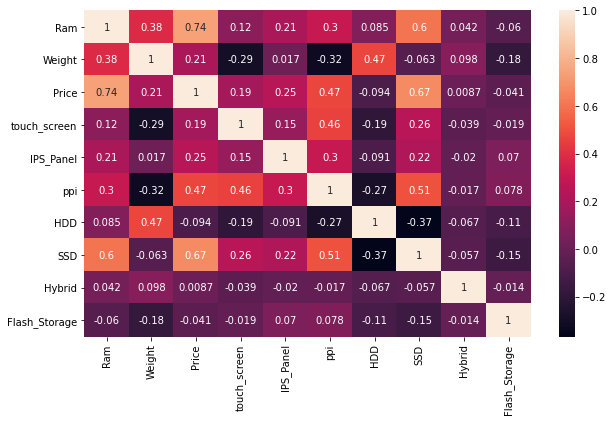

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(laptop_df.corr(),annot=True)
plt.show()

In [67]:
### correlation with price
corr = laptop_df.corr().Price
corr

Ram              0.743007
Weight           0.210370
Price            1.000000
touch_screen     0.191227
IPS_Panel        0.252208
ppi              0.473488
HDD             -0.093700
SSD              0.670799
Hybrid           0.008747
Flash_Storage   -0.040511
Name: Price, dtype: float64

- there is less correlation of price with Flash_Storage & Hybrid. these columns can be dropped

In [68]:
### dropping columns Flash_Storage & Hybrid
laptop_df.drop(columns=["Flash_Storage","Hybrid"],inplace=True)

In [69]:
laptop_df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touch_screen,IPS_Panel,ppi,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96096,0,1,226.983005,Intel Core i5,0,256


In [70]:
### handling Gpu column
laptop_df["Gpu"].value_counts().head(10)

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
Nvidia GeForce 940MX        43
AMD Radeon 530              41
Intel HD Graphics 500       39
Intel HD Graphics 400       37
Nvidia GeForce GTX 1070     30
Name: Gpu, dtype: int64

In [71]:
### extracting Gpu brand by splitting
laptop_df["Gpu brand"] = laptop_df["Gpu"].str.split(" ").str[0]
laptop_df["Gpu brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

there is only one Gpu brand ARM, it can be dropped

In [72]:
### finding row num where laptop_df["Gpu brand"]=="ARM"
laptop_df[laptop_df["Gpu brand"]=="ARM"]

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touch_screen,IPS_Panel,ppi,Cpu Brand,HDD,SSD,Gpu brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35112,1,1,234.5074,AMD,0,0,ARM


In [73]:
laptop_df.drop(1191,axis=0,inplace=True)

In [74]:
### row with ARM has been dropped
laptop_df["Gpu brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

In [75]:
### dropping Gpu column
laptop_df.drop(["Gpu"],axis=1,inplace=True)

In [76]:
laptop_df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,touch_screen,IPS_Panel,ppi,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71379,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47896,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96096,0,1,226.983005,Intel Core i5,0,256,Intel


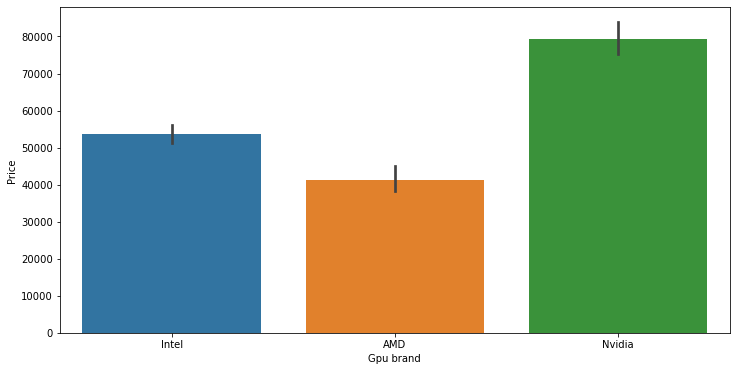

In [77]:
### barplot of Gpu brand & Price
plt.figure(figsize=(12,6))
sns.barplot(x=laptop_df["Gpu brand"],y=laptop_df["Price"])
plt.show()

- Price of Nvidia laptops are higher 

In [78]:
laptop_df.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

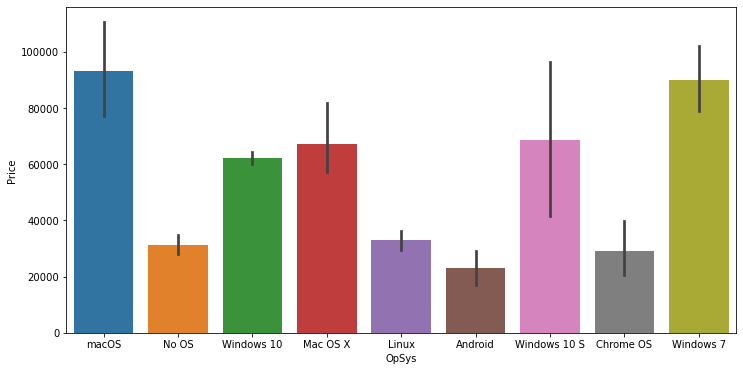

In [79]:
### barplot between OpSys and Price
plt.figure(figsize=(12,6))
sns.barplot(x=laptop_df["OpSys"],y=laptop_df["Price"])
plt.show()

- Price of macOS is higher than other operating system

In [80]:
### handling OpSys column
def ops(abc):
    if abc == 'Windows 10' or abc == 'Windows 7' or abc == 'Windows 10 S':
        return "Windows"
    elif abc == 'macOS' or abc == 'Mac OS X':
        return "Mac"
    else:
        return "Others/No OS/Linux"
        

In [81]:
laptop_df["OpSys"] = laptop_df["OpSys"].apply(ops)
laptop_df["OpSys"].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: OpSys, dtype: int64

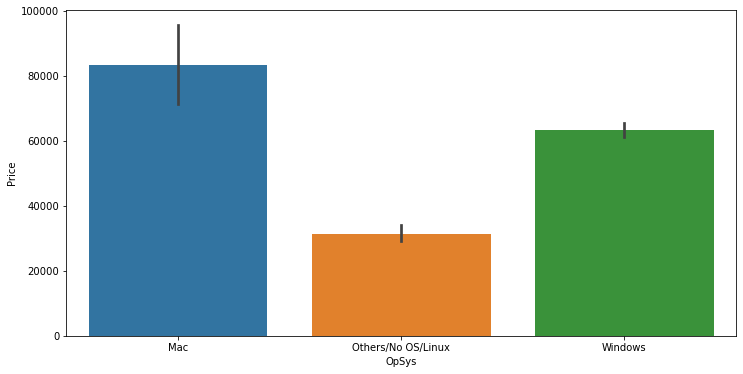

In [82]:
plt.figure(figsize=(12,6))
sns.barplot(x=laptop_df["OpSys"],y=laptop_df["Price"])
plt.show()

In [83]:
laptop_df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,touch_screen,IPS_Panel,ppi,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71379,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47896,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96096,0,1,226.983005,Intel Core i5,0,256,Intel


In [162]:
laptop_df.TypeName.value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [165]:
laptop_df["Gpu brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

In [164]:
laptop_df["Cpu Brand"].value_counts()

Intel Core i7            527
Intel Core i5            423
Intel Core i3            136
Intel Celeron Dual        80
Other Intel Processor     74
AMD                       62
Name: Cpu Brand, dtype: int64

In [163]:
laptop_df.OpSys.value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: OpSys, dtype: int64

In [161]:
laptop_df.Company.value_counts()

Lenovo       297
Dell         297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Google         3
Chuwi          3
LG             3
Fujitsu        3
Huawei         2
Name: Company, dtype: int64

## Split the dataset 

In [91]:
### Selecting independent variables
X = laptop_df.drop(columns=["Price"])
X.head()

,Company,TypeName,Ram,OpSys,Weight,touch_screen,IPS_Panel,ppi,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [92]:
### Selecting dependent variables
y = np.log(laptop_df["Price"])
y.head()

0    11.175759
1    10.776787
2    10.329931
3    11.814473
4    11.473103
Name: Price, dtype: float64

## OneHotEncoder


In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

In [135]:
### spliting the data into train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [150]:
X_train.head(3)

,Company,TypeName,Ram,OpSys,Weight,touch_screen,IPS_Panel,ppi,Cpu Brand,HDD,SSD,Gpu brand
91,Acer,Notebook,8,Windows,2.20,0,0,141.211998,Intel Core i7,1000,0,Nvidia
863,Lenovo,Gaming,8,Others/No OS/Linux,2.50,0,1,141.211998,Intel Core i5,1000,0,Nvidia
552,Dell,Gaming,16,Windows,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia


In [153]:
y_train.head(3)

91     10.510804
863    10.900178
552    11.876200
Name: Price, dtype: float64

In [154]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),
                                 [0,1,3,8,11])],remainder='passthrough')


### using LinearRegression
step2 = LinearRegression()
pipe = Pipeline([("step1",step1), ("step2",step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

r2_score(y_test,y_pred)

0.8104310717782202

In [156]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),
                                 [0,1,3,8,11])],remainder='passthrough')


### using DecisionTreeRegressor
step2 = DecisionTreeRegressor()
pipe = Pipeline([("step1",step1), ("step2",step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

r2_score(y_test,y_pred)

0.750896988924916

In [167]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,handle_unknown='ignore'),
                                 [0,1,3,8,11])],remainder='passthrough')

### using RandomForestRegressor
step2 = RandomForestRegressor()
pipe = Pipeline([("step1",step1), ("step2",step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

r2_score(y_test,y_pred)

0.8643255205531826

## Exporting Model


In [170]:
import pickle

In [171]:
pickle.dump(laptop_df,open("laptop_df.pkl","wb"))
pickle.dump(pipe,open("RFR.pkl","wb"))